<a href="https://colab.research.google.com/github/GabeMaldonado/AIforMedicine/blob/master/AIforMed_C3_W1_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI for Medicine Course 3 Week 1 Lab 1
## Pandas for a Medical Dataset

In this lab we will be using `pandas` to manipulate medical data. 

In [0]:
# import pandas

import pandas as pd

In [2]:
# Load data

data = pd.read_csv('/content/dummy_data.csv', index_col=0)
data.head()

,sex,age,obstruct,outcome,TRTMT
1,0,57,0,1,True
2,1,68,0,0,False
3,0,72,0,0,True
4,0,66,1,1,True
5,1,69,0,1,False


In [8]:
# Check the data's shape

print(f"The dataframe has {data.shape[0]} rows and {data.shape[1]} columns")

The dataframe has 50 rows and 5 columns


Below is a description of all the fields:
- `sex (binary): 1 if Male, 0 otherwise`
- `age (int): age of patient at start of the study`
- `obstruct (binary): obstruction of colon by tumor`
- `outcome (binary): 1 if died within 5 years`
- `TRTMT (binary): patient was treated`


## DATAFRAME

What is a dataframe? A dataframe (df) is a two-dimensional, labeled data structure with columns that can be of diffrent datatypes (int, float, bool).
Data can be accessed in different ways. If we are looking to access a particular colum of data, we can use the '.' dot-notation. To retrieve the data in the column we pass the dataframe name + '.' + 'column_name'.
For instance, to access the age column: 

In [12]:
# retrieve the first 5 elements of the age column
data.age.head()

1    57
2    68
3    72
4    66
5    69
Name: age, dtype: int64

## SERIES

Each column of the dataframe is of type **Series** which are one-dimensional labeled arrays plus its index. Series are similar to python lists with the difference that they can only contain one datatype.
Besides dot notation, there are other ways to access the Series data:

In [13]:
# dot notation
data.age.head()

1    57
2    68
3    72
4    66
5    69
Name: age, dtype: int64

In [17]:
# using .loc
data.loc[:, "age"].head()

1    57
2    68
3    72
4    66
5    69
Name: age, dtype: int64

In [18]:
# using bracket notation
data["age"].head()

1    57
2    68
3    72
4    66
5    69
Name: age, dtype: int64

## Slicing the Dataframe

Often times we would want to retreive certain elements (rows and columns) form our dataframe based on some criteria. For instance, we might want to retrive the data of patients that are younger than 50. We can **slice** the dataframe as follows:

In [26]:
data[data.age < 50]

,sex,age,obstruct,outcome,TRTMT
6,1,43,0,1,True
15,1,46,1,0,False
19,0,34,1,1,True
32,0,33,1,0,True
33,0,49,0,1,False
34,1,47,0,0,False
42,0,39,1,0,False
45,1,40,0,0,True
67,1,49,0,0,True
70,0,40,0,0,False


What if you wanted to filter a DataFrame based on multiple conditions? 
- To do this, use the "&" as the 'and' operator.  Don't use `and`.
- You can use '|' as the 'or' operator.  Don't use `or`.


Trying to combine two conditions using `and` won't work
```
data[(data.age <= 50) and (data.TRTMT == True)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().
```

- Don't forget the parentheses around each condition!
- Without parentheses, this won't work.


Trying to combine two conditions without parentheses results in an error

```
data[ data.age <= 50 & data.TRTMT == True]
```

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().


#### Retrieve data from patients that are younger than 50 and that have received treatment:

In [27]:
# Get patients aged 50 or less who received treatment
data[(data.age <= 50) & (data.TRTMT == True)]

,sex,age,obstruct,outcome,TRTMT
6,1,43,0,1,True
19,0,34,1,1,True
24,0,50,0,0,True
32,0,33,1,0,True
45,1,40,0,0,True
67,1,49,0,0,True


In [28]:
# Check datatype of the sliced data

type(data[(data.age <= 50) & (data.TRTMT == True)])

pandas.core.frame.DataFrame

### Advanced Options

There are more advanced "tricks" that we can apply to our dataframe to perform more advanced calculations

In [29]:
# Applying len() to the df yields the number of rows
print(f"len: {len(data[(data.age <= 50)])}")

# Accessing the 'shape' attribute of the df yields a tuple of the form (rows, cols)
print(f"shape (rows, cols) {data[(data.age <= 50)].shape}")

# Accessing the 'size' attribute of the df yields the number of elements in the df:
print(f"size: {data[(data.age <= 50)].size}")

len: 11
shape (rows, cols) (11, 5)
size: 55


In [30]:
# Applying len() to the df yields the number of rows
print(f"{len(data.TRTMT)}")

# Accessing the 'shape' attribute of the df yields a tuple of the form (rows, cols)
print(f"{data.TRTMT.shape}")

# Accessing the 'size' attribute of the df yields the number of elements in the df:
print(f"{data.TRTMT.size}")

50
(50,)
50


# Exercise:

Calculate the proportion of male patients.

There are a few ways to solve this, we can add the number of male patients and divide by the total number of patients. 

We can also apply the `mean()` since we are dealing with binary data (0, 1)

In [32]:
total_sex = len(data["sex"])
print(total_sex)
males = sum(data["sex"] == 1)
print(males)

prop_male_patients = males / len(data)
print(f"The proportion of male patients is {prop_male_patients}")

50
21
The proportion of male patients is 0.42


In [33]:
# use the .mean(), which is much simpler
data.sex.mean()

0.42

### Updating Values

Often times, we would need to update records/data in our dataframe. 
Let's say you detected an error in the data, where the second patient was actually treated. 
- To update the data, you can use .loc[row, col] and specify the row and column you want to update.
- Notice that because the dataframe's index is defined, the first row is at index 1 and not 0.
- If the index was not set, then indexing would start at 0.

Try to access patient 0, and note the error message
```
data.loc[0,'TRTMT']

KeyError: 0
```

In [36]:
# print the data head

data.head()

,sex,age,obstruct,outcome,TRTMT
1,0,57,0,1,True
2,1,68,0,0,False
3,0,72,0,0,True
4,0,66,1,1,True
5,1,69,0,1,False


In [35]:
# check the TRTMT value for patient 2

data.loc[2, "TRTMT"]

False

In [38]:
# Update the treatment record for patient 2 to TRUE

data.loc[2, "TRTMT"] = True
data.head()

,sex,age,obstruct,outcome,TRTMT
1,0,57,0,1,True
2,1,68,0,0,True
3,0,72,0,0,True
4,0,66,1,1,True
5,1,69,0,1,False


Let's now assume that the data collected is for females only so we need to change the entire column to $0$:

In [40]:
data.loc[:, 'sex'] = 0
data.head()

,sex,age,obstruct,outcome,TRTMT
1,0,57,0,1,True
2,0,68,0,0,True
3,0,72,0,0,True
4,0,66,1,1,True
5,0,69,0,1,False


We can also access/slice data by range `start:end`. We do so by passing the indices (rows, columns) of the desire data. 
For instance, if we want to retrieve data for rows 2 and 4 (inclusive):

In [58]:
data.loc[2:4, :]

,sex,age,obstruct,outcome,TRTMT
2,0,68,0,0,True
3,0,72,0,0,True
4,0,66,1,1,True


Now, let's say that I only want to retrieve the age for patient 3.
For this we woul use the `iloc` and the index for that value:


In [63]:
data.iloc[2:3, 1]

3    72
Name: age, dtype: int64

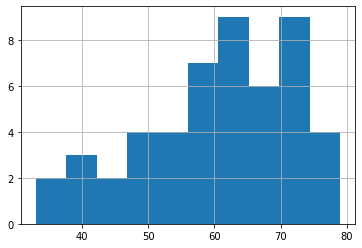

In [67]:
data['age'].hist()

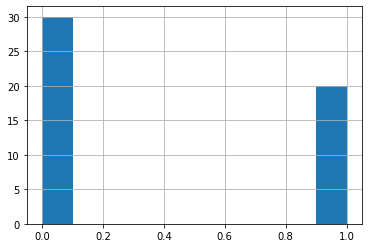

In [79]:
data['outcome'].hist()

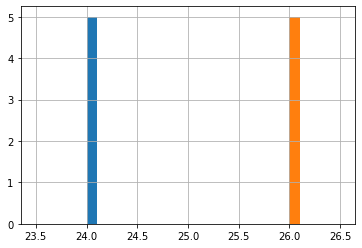

In [87]:
data[data.TRTMT == 1].count().hist()
data[data.TRTMT == 0].count().hist()